In [1]:
import pandas as pd
import numpy as np

import json, ast

from IPython.display import display, HTML

In [2]:
lPerfs = []
lPrefix = "MODEL_PERFS" + " "
with open("auto_tests_perfs.txt") as f:
    lines = f.readlines()
    for line in lines:
        # print(line)
        if(line.startswith(lPrefix)):
            lJSON = line[len(lPrefix):]
            # print(lJSON)
            lDict = ast.literal_eval(lJSON)
            lDict["options"] = lDict["options"] if (lDict["options"] is not None) else "{}"
            lPerfs.append(lDict)

In [3]:
lPerfs[:5]

[{'class_name': 'mllite.DecisionTreeClassifier',
  'model_name': 'DecisionTreeClassifier',
  'options': '{"max_depth" : 6, "max_leaf_nodes" : 32}',
  'dataset': 'BinaryClass_100_medium',
  'size': 512,
  'accuracy': 0.962890625,
  'auc': 0.9867019653320312,
  'apply_output': 'logs/auto_tests/classification/DecisionTreeClassifier/mllite.DecisionTreeClassifier_BinaryClass_100_medium_option_1.csv'},
 {'class_name': 'mllite.DecisionTreeClassifier',
  'model_name': 'DecisionTreeClassifier',
  'options': '{"max_depth" : 6, "max_leaf_nodes" : 32}',
  'dataset': 'BinaryClass_100_original',
  'size': 1024,
  'accuracy': 0.9384765625,
  'auc': 0.9820728302001953,
  'apply_output': 'logs/auto_tests/classification/DecisionTreeClassifier/mllite.DecisionTreeClassifier_BinaryClass_100_original_option_1.csv'},
 {'class_name': 'mllite.DecisionTreeClassifier',
  'model_name': 'DecisionTreeClassifier',
  'options': '{"max_depth" : 6, "max_leaf_nodes" : 32}',
  'dataset': 'BinaryClass_100_quantized',
  's

In [4]:
df = pd.DataFrame(lPerfs)
df.sample(50, random_state=1789)

,class_name,model_name,options,dataset,size,accuracy,auc,apply_output,mse,mae,mape,r2
2201,sklearn.svm._classes.SVR,SVR,"{""C"" : 2}",freidman3_sampled,12,NaN,NaN,logs/auto_tests/regression/SVR/sklearn.svm._cl...,2.333971e-02,0.135258,0.110333,0.517723
295,mllite.MLPClassifier,MLPClassifier,{},iris_original,150,0.700000,0.980333,logs/auto_tests/classification/MLPClassifier/m...,NaN,NaN,NaN,NaN
217,mllite.MLPClassifier,MLPClassifier,"{""hidden_layer_sizes"" : [4, 8, 6]}",census_original,48842,0.760718,0.500000,logs/auto_tests/classification/MLPClassifier/m...,NaN,NaN,NaN,NaN
1453,sklearn.ensemble._forest.RandomForestRegressor,RandomForestRegressor,"{""max_depth"" : 6, ""n_estimators"" : 5, ""min_wei...",RandomReg_100_sampled,128,NaN,NaN,logs/auto_tests/regression/RandomForestRegress...,4.509108e+03,49.119110,0.914777,0.808974
2355,sklearn.tree._classes.DecisionTreeClassifier,DecisionTreeClassifier,{},FourClass_10_original,1024,0.853516,0.964383,logs/auto_tests/classification/DecisionTreeCla...,NaN,NaN,NaN,NaN
1025,mllite.SVC,SVC,{},FourClass_100_original,1024,0.958984,0.407012,logs/auto_tests/classification/SVC/mllite.SVC_...,NaN,NaN,NaN,NaN
1072,mllite.SVR,SVR,"{""C"" : 2}",RandomReg_100_medium,512,NaN,NaN,logs/auto_tests/regression/SVR/mllite.SVR_Rand...,2.531332e+04,124.291640,0.972912,0.038338
2259,sklearn.tree._classes.DecisionTreeClassifier,DecisionTreeClassifier,"{""max_depth"" : 6, ""max_leaf_nodes"" : 32}",BinaryClass_100_original,1024,0.938477,0.982073,logs/auto_tests/classification/DecisionTreeCla...,NaN,NaN,NaN,NaN
783,mllite.RidgeClassifier,RidgeClassifier,"{""alpha"" : 0.0000001}",digits_tiny,16,0.812500,0.987179,logs/auto_tests/classification/RidgeClassifier...,NaN,NaN,NaN,NaN
2555,xgboost.sklearn.XGBClassifier,XGBClassifier,{},iris_sampled,18,1.000000,1.000000,logs/auto_tests/classification/XGBClassifier/x...,NaN,NaN,NaN,NaN


In [5]:
lOptions = df['options'].value_counts(dropna=False)
lOptionValues = list(lOptions.index)

In [6]:
gModels = np.unique(df.model_name.values)

In [7]:
gModels = list(gModels)

In [8]:
gModels

['DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'MLPClassifier',
 'MLPRegressor',
 'NuSVC',
 'NuSVR',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RidgeClassifier',
 'RidgeRegressor',
 'SVC',
 'SVR',
 'XGBClassifier',
 'XGBRegressor']

In [9]:

def is_different(x, y):
    # print("is_different" , x, y)
    if(pd.isna(x)):
        return 1
    if(pd.isna(y)):
        return 1
    # return 1 if(abs(x -y) >= 0.05) else 0
    x1 = round(x, 4)
    y1 = round(y, 4)
    return 1 if(abs((x1 -y1)/2/(abs(x1) + abs(y1) + 0.0001)) >= 0.05) else 0

def debrief_model(model_name):
    print("DEBRIEF_MODEL_START", model_name)
    lModelData = [perf for perf in lPerfs if (perf["model_name"] == model_name)] # and perf["class_name"].startswith('sklearn'))]
    lModelData_mllite = [perf for perf in lModelData if perf["class_name"].startswith('mllite')]
    lModelData_sklearn = [perf for perf in lModelData if perf["class_name"].startswith('sklearn') or perf["class_name"].startswith('xgb')]
    
    df_mllite = pd.DataFrame(lModelData_mllite)
    df_sklearn = pd.DataFrame(lModelData_sklearn)
    print(df_mllite.columns)
    print(df_sklearn.columns)
    columns_to_drop = ['class_name', 'auc']
    lAllcolumns = list(df_mllite.columns) + list(df_sklearn.columns)
    print("ALL_COLUMNS", lAllcolumns)
    if('auc' not in lAllcolumns):
        columns_to_drop = ['class_name', 'mse', 'mae', 'mape']
    if(len(df_mllite.columns) > 0):
        df_mllite = df_mllite.drop(columns=columns_to_drop)        
        df_mllite = df_mllite.sort_values(by=['dataset', 'model_name', 'options'])    
        df_mllite.set_index(['dataset', 'model_name', 'options'], inplace=True)
    if(len(df_sklearn.columns) > 0):    
        df_sklearn = df_sklearn.drop(columns=columns_to_drop)        
        df_sklearn = df_sklearn.sort_values(by=['dataset', 'model_name', 'options'])
        df_sklearn.set_index(['dataset', 'model_name', 'options'], inplace=True)    
    # display(df_sklearn[:5])
    # display(df_mllite[:5])
    if(len(df_mllite.columns) > 0):
        df_joined = df_mllite.merge(df_sklearn, how='left', left_index=True, right_index=True, suffixes=('_mllite', '_sklearn'),)
    else:
        df_mllite = df_sklearn.head(0)
        df_joined = df_sklearn.merge(df_mllite, how='left', left_index=True, right_index=True, suffixes=('_sklearn', '_mllite'),)
        
    # display(df_joined)
    perf = 'accuracy' if('accuracy' in df_mllite.columns) else 'r2'
    col1, col2 = perf + '_mllite', perf + '_sklearn'
    df_joined['different'] = df_joined.apply(lambda x : is_different(x[col1], x[col2]), axis=1)
    df_joined2 = df_joined[df_joined['different'] == 1]
    display(df_joined2)
    print("DEBRIEF_MODEL_END", model_name, df_joined.shape[0], df_joined['different'].sum())
    return df_joined

    

In [10]:
full_reports = []

for model_name in gModels:
    full_reports = full_reports + [debrief_model(model_name)]

    

DEBRIEF_MODEL_START DecisionTreeClassifier
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output']


size_mllite  \
dataset         model_name             options                                                 
digits_original DecisionTreeClassifier {"max_depth" : 6, "max_leaf_nodes" : 32}         1797   
                                       {}                                               1797   

                                                                                 accuracy_mllite  \
dataset         model_name             options                                                     
digits_original DecisionTreeClassifier {"max_depth" : 6, "max_leaf_nodes" : 32}         0.653868   
                                       {}                                               0.748470   

                                                                                                               apply_output_mllite  \
dataset         model_name             options                                                                                       
digits_original DecisionTreeClassifier {"max_depth" : 6, "max_leaf_nodes" : 32}  logs/auto_tests/classification/DecisionTreeCla...   
                                       {}                                        logs/auto_tests/classification/DecisionTreeCla...   

                                                                                 size_sklearn  \
dataset         model_name             options                                                  
digits_original DecisionTreeClassifier {"max_depth" : 6, "max_leaf_nodes" : 32}          1797   
                                       {}                                                1797   

                                                                                 accuracy_sklearn  \
dataset         model_name             options                                                      
digits_original DecisionTreeClassifier {"max_depth" : 6, "max_leaf_nodes" : 32}          0.811909   
                                       {}                                                0.922092   

                                                                                                              apply_output_sklearn  \
dataset         model_name             options                                                                                       
digits_original DecisionTreeClassifier {"max_depth" : 6, "max_leaf_nodes" : 32}  logs/auto_tests/classification/DecisionTreeCla...   
                                       {}                                        logs/auto_tests/classification/DecisionTreeCla...   

                                                                                 different  
dataset         model_name             options                                              
digits_original DecisionTreeClassifier {"max_depth" : 6, "max_leaf_nodes" : 32}          1  
                                       {}                                                1

DEBRIEF_MODEL_END DecisionTreeClassifier 108 2
DEBRIEF_MODEL_START DecisionTreeRegressor
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output']


,,,size_mllite,r2_mllite,apply_output_mllite,size_sklearn,r2_sklearn,apply_output_sklearn,different
dataset,model_name,options,,,,,,,
california_housing_original,DecisionTreeRegressor,{},20640,0.489296,logs/auto_tests/regression/DecisionTreeRegress...,20640,0.708691,logs/auto_tests/regression/DecisionTreeRegress...,1
california_housing_quantized,DecisionTreeRegressor,{},20640,0.501110,logs/auto_tests/regression/DecisionTreeRegress...,20640,0.654088,logs/auto_tests/regression/DecisionTreeRegress...,1
california_housing_sampled,DecisionTreeRegressor,{},2580,0.520702,logs/auto_tests/regression/DecisionTreeRegress...,2580,0.750075,logs/auto_tests/regression/DecisionTreeRegress...,1


DEBRIEF_MODEL_END DecisionTreeRegressor 84 3
DEBRIEF_MODEL_START MLPClassifier
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output']


size_mllite  \
dataset                model_name    options                                           
BreastCancer_original  MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}          569   
BreastCancer_sampled   MLPClassifier {}                                           71   
BreastCancer_small     MLPClassifier {}                                           64   
census_medium          MLPClassifier {}                                          512   
census_one_hot_medium  MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}          512   
census_one_hot_sampled MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}         6105   
                                     {}                                         6105   
digits_tiny            MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}           16   

                                                                         accuracy_mllite  \
dataset                model_name    options                                               
BreastCancer_original  MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}         0.644991   
BreastCancer_sampled   MLPClassifier {}                                         0.859155   
BreastCancer_small     MLPClassifier {}                                         0.859375   
census_medium          MLPClassifier {}                                         0.779297   
census_one_hot_medium  MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}         0.779297   
census_one_hot_sampled MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}         0.239967   
                                     {}                                         0.760033   
digits_tiny            MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}         0.250000   

                                                                                                       apply_output_mllite  \
dataset                model_name    options                                                                                 
BreastCancer_original  MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}  logs/auto_tests/classification/MLPClassifier/m...   
BreastCancer_sampled   MLPClassifier {}                                  logs/auto_tests/classification/MLPClassifier/m...   
BreastCancer_small     MLPClassifier {}                                  logs/auto_tests/classification/MLPClassifier/m...   
census_medium          MLPClassifier {}                                  logs/auto_tests/classification/MLPClassifier/m...   
census_one_hot_medium  MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}  logs/auto_tests/classification/MLPClassifier/m...   
census_one_hot_sampled MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}  logs/auto_tests/classification/MLPClassifier/m...   
                                     {}                                  logs/auto_tests/classification/MLPClassifier/m...   
digits_tiny            MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}  logs/auto_tests/classification/MLPClassifier/m...   

                                                                         size_sklearn  \
dataset                model_name    options                                            
BreastCancer_original  MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}           569   
BreastCancer_sampled   MLPClassifier {}                                            71   
BreastCancer_small     MLPClassifier {}                                            64   
census_medium          MLPClassifier {}                                           512   
census_one_hot_medium  MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}           512   
census_one_hot_sampled MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}          6105   
                                     {}                                          6105   
digits_tiny            MLPClassifier {"hidden_layer_sizes" : [4, 8, 6]}            16   

                                                                         accuracy_sklearn  \
dataset                mod

DEBRIEF_MODEL_END MLPClassifier 108 8
DEBRIEF_MODEL_START MLPRegressor
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output']


,,,size_mllite,r2_mllite,apply_output_mllite,size_sklearn,r2_sklearn,apply_output_sklearn,different
dataset,model_name,options,,,,,,,
RandomReg_10_quantized,MLPRegressor,"{""hidden_layer_sizes"" : [4, 8, 6]}",1024,0.006992,logs/auto_tests/regression/MLPRegressor/mllite...,1024,0.010801,logs/auto_tests/regression/MLPRegressor/sklear...,1
freidman3_sampled,MLPRegressor,{},12,-406.632590,logs/auto_tests/regression/MLPRegressor/mllite...,12,-258.280984,logs/auto_tests/regression/MLPRegressor/sklear...,1
freidman3_tiny,MLPRegressor,{},16,-493.441923,logs/auto_tests/regression/MLPRegressor/mllite...,16,-343.711675,logs/auto_tests/regression/MLPRegressor/sklear...,1


DEBRIEF_MODEL_END MLPRegressor 84 3
DEBRIEF_MODEL_START NuSVC
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output']


,,,size_mllite,accuracy_mllite,apply_output_mllite,size_sklearn,accuracy_sklearn,apply_output_sklearn,different
dataset,model_name,options,,,,,,,
BreastCancer_original,NuSVC,"{""nu"" : 0.1}",569,0.931459,logs/auto_tests/classification/NuSVC/mllite.Nu...,569,0.680141,logs/auto_tests/classification/NuSVC/sklearn.s...,1
census_sampled,NuSVC,"{""nu"" : 0.1}",6105,0.665029,logs/auto_tests/classification/NuSVC/mllite.Nu...,6105,0.496478,logs/auto_tests/classification/NuSVC/sklearn.s...,1


DEBRIEF_MODEL_END NuSVC 92 2
DEBRIEF_MODEL_START NuSVR
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output']


,,,size_mllite,r2_mllite,apply_output_mllite,size_sklearn,r2_sklearn,apply_output_sklearn,different
dataset,model_name,options,,,,,,,
california_housing_sampled,NuSVR,"{""nu"" : 0.1}",2580,-0.134476,logs/auto_tests/regression/NuSVR/mllite.NuSVR_...,2580,-0.107531,logs/auto_tests/regression/NuSVR/sklearn.svm._...,1
freidman2_medium,NuSVR,"{""nu"" : 0.1}",100,-0.250159,logs/auto_tests/regression/NuSVR/mllite.NuSVR_...,100,-0.333783,logs/auto_tests/regression/NuSVR/sklearn.svm._...,1
freidman2_original,NuSVR,"{""nu"" : 0.1}",100,-0.250159,logs/auto_tests/regression/NuSVR/mllite.NuSVR_...,100,-0.333783,logs/auto_tests/regression/NuSVR/sklearn.svm._...,1
freidman2_quantized,NuSVR,"{""nu"" : 0.1}",100,-0.255255,logs/auto_tests/regression/NuSVR/mllite.NuSVR_...,100,-0.344423,logs/auto_tests/regression/NuSVR/sklearn.svm._...,1
freidman3_medium,NuSVR,"{""nu"" : 0.1}",100,-0.203110,logs/auto_tests/regression/NuSVR/mllite.NuSVR_...,100,-0.307089,logs/auto_tests/regression/NuSVR/sklearn.svm._...,1
freidman3_original,NuSVR,"{""nu"" : 0.1}",100,-0.203110,logs/auto_tests/regression/NuSVR/mllite.NuSVR_...,100,-0.307089,logs/auto_tests/regression/NuSVR/sklearn.svm._...,1


DEBRIEF_MODEL_END NuSVR 84 6
DEBRIEF_MODEL_START RandomForestClassifier
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output']


size_mllite  \
dataset            model_name             options                                                           
FourClass_100_tiny RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...           16   
                                          {}                                                           16   
FourClass_10_tiny  RandomForestClassifier {}                                                           16   
digits_tiny        RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...           16   
                                          {}                                                           16   
iris_tiny          RandomForestClassifier {}                                                           16   

                                                                                              accuracy_mllite  \
dataset            model_name             options                                                               
FourClass_100_tiny RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...           0.8125   
                                          {}                                                           1.0000   
FourClass_10_tiny  RandomForestClassifier {}                                                           1.0000   
digits_tiny        RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...           0.9375   
                                          {}                                                           1.0000   
iris_tiny          RandomForestClassifier {}                                                           1.0000   

                                                                                                                            apply_output_mllite  \
dataset            model_name             options                                                                                                 
FourClass_100_tiny RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...  logs/auto_tests/classification/RandomForestCla...   
                                          {}                                                  logs/auto_tests/classification/RandomForestCla...   
FourClass_10_tiny  RandomForestClassifier {}                                                  logs/auto_tests/classification/RandomForestCla...   
digits_tiny        RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...  logs/auto_tests/classification/RandomForestCla...   
                                          {}                                                  logs/auto_tests/classification/RandomForestCla...   
iris_tiny          RandomForestClassifier {}                                                  logs/auto_tests/classification/RandomForestCla...   

                                                                                              size_sklearn  \
dataset            model_name             options                                                            
FourClass_100_tiny RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...           NaN   
                                          {}                                                           NaN   
FourClass_10_tiny  RandomForestClassifier {}                                                           NaN   
digits_tiny        RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...           NaN   
                                          {}                                                           NaN   
iris_tiny          RandomForestClassifier {}                                                           NaN   

                                                                                              accuracy_sklearn  \
dataset            model_name             options                                                                
FourClass_100_tiny RandomFores

DEBRIEF_MODEL_END RandomForestClassifier 108 6
DEBRIEF_MODEL_START RandomForestRegressor
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output']


,,,size_mllite,r2_mllite,apply_output_mllite,size_sklearn,r2_sklearn,apply_output_sklearn,different
dataset,model_name,options,,,,,,,
california_housing_original,RandomForestRegressor,{},20640,0.524921,logs/auto_tests/regression/RandomForestRegress...,20640,0.744230,logs/auto_tests/regression/RandomForestRegress...,1
california_housing_quantized,RandomForestRegressor,{},20640,0.509368,logs/auto_tests/regression/RandomForestRegress...,20640,0.677918,logs/auto_tests/regression/RandomForestRegress...,1
california_housing_sampled,RandomForestRegressor,{},2580,0.614872,logs/auto_tests/regression/RandomForestRegress...,2580,0.803879,logs/auto_tests/regression/RandomForestRegress...,1


DEBRIEF_MODEL_END RandomForestRegressor 84 3
DEBRIEF_MODEL_START RidgeClassifier
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output']


size_mllite  \
dataset          model_name      options                              
census_medium    RidgeClassifier {"alpha" : 0.0000001}          512   
                                 {}                             512   
census_original  RidgeClassifier {"alpha" : 0.0000001}        48842   
                                 {}                           48842   
census_sampled   RidgeClassifier {"alpha" : 0.0000001}         6105   
                                 {}                            6105   
census_small     RidgeClassifier {"alpha" : 0.0000001}           64   
                                 {}                              64   
census_tiny      RidgeClassifier {"alpha" : 0.0000001}           16   
                                 {}                              16   
digits_medium    RidgeClassifier {"alpha" : 0.0000001}          512   
                                 {}                             512   
digits_original  RidgeClassifier {"alpha" : 0.0000001}         1797   
                                 {}                            1797   
digits_quantized RidgeClassifier {"alpha" : 0.0000001}         1797   
                                 {}                            1797   
digits_sampled   RidgeClassifier {"alpha" : 0.0000001}          224   
                                 {}                             224   
digits_small     RidgeClassifier {"alpha" : 0.0000001}           64   
                                 {}                              64   
digits_tiny      RidgeClassifier {"alpha" : 0.0000001}           16   

                                                        accuracy_mllite  \
dataset          model_name      options                                  
census_medium    RidgeClassifier {"alpha" : 0.0000001}         0.414062   
                                 {}                            0.414062   
census_original  RidgeClassifier {"alpha" : 0.0000001}         0.460771   
                                 {}                            0.460771   
census_sampled   RidgeClassifier {"alpha" : 0.0000001}         0.450778   
                                 {}                            0.450778   
census_small     RidgeClassifier {"alpha" : 0.0000001}         0.359375   
                                 {}                            0.375000   
census_tiny      RidgeClassifier {"alpha" : 0.0000001}         0.375000   
                                 {}                            0.375000   
digits_medium    RidgeClassifier {"alpha" : 0.0000001}         0.158203   
                                 {}                            0.154297   
digits_original  RidgeClassifier {"alpha" : 0.0000001}         0.170284   
                                 {}                            0.170284   
digits_quantized RidgeClassifier {"alpha" : 0.0000001}         0.274903   
                                 {}                            0.276016   
digits_sampled   RidgeClassifier {"alpha" : 0.0000001}         0.151786   
                                 {}                            0.138393   
digits_small     RidgeClassifier {"alpha" : 0.0000001}         0.187500   
                                 {}                            0.250000   
digits_tiny      RidgeClassifier {"alpha" : 0.0000001}         0.812500   

                                                                                      apply_output_mllite  \
dataset          model_name      options                                                                    
census_medium    RidgeClassifier {"alpha" : 0.0000001}  logs/auto_tests/classification/RidgeClassifier...   
                                 {}                     logs/auto_tests/classification/RidgeClassifier...   
census_original  RidgeClassifier {"alpha" : 0.0000001}  logs/auto_tests/classification/RidgeClassifier...   
                                 {}                     logs/auto_tests/classification/RidgeClassifier...   
census_sampled   RidgeClassifier {"alpha" 

DEBRIEF_MODEL_END RidgeClassifier 102 21
DEBRIEF_MODEL_START RidgeRegressor
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output']


,,,size_mllite,r2_mllite,apply_output_mllite,size_sklearn,r2_sklearn,apply_output_sklearn,different
dataset,model_name,options,,,,,,,
diabetes_sampled,RidgeRegressor,{},55,0.720652,logs/auto_tests/regression/RidgeRegressor/mlli...,55,0.271435,logs/auto_tests/regression/RidgeRegressor/skle...,1
diabetes_small,RidgeRegressor,{},64,0.737371,logs/auto_tests/regression/RidgeRegressor/mlli...,64,0.311380,logs/auto_tests/regression/RidgeRegressor/skle...,1
diabetes_tiny,RidgeRegressor,{},16,0.952936,logs/auto_tests/regression/RidgeRegressor/mlli...,16,0.132661,logs/auto_tests/regression/RidgeRegressor/skle...,1
freidman1_sampled,RidgeRegressor,{},12,0.938692,logs/auto_tests/regression/RidgeRegressor/mlli...,12,0.674153,logs/auto_tests/regression/RidgeRegressor/skle...,1
freidman1_tiny,RidgeRegressor,{},16,0.896232,logs/auto_tests/regression/RidgeRegressor/mlli...,16,0.653666,logs/auto_tests/regression/RidgeRegressor/skle...,1


DEBRIEF_MODEL_END RidgeRegressor 84 5
DEBRIEF_MODEL_START SVC
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output']


size_mllite  accuracy_mllite  \
dataset         model_name options                                   
census_original SVC        {"C" : 2}        48842         0.330597   
                           {}               48842         0.677798   

                                                                    apply_output_mllite  \
dataset         model_name options                                                        
census_original SVC        {"C" : 2}  logs/auto_tests/classification/SVC/mllite.SVC_...   
                           {}         logs/auto_tests/classification/SVC/mllite.SVC_...   

                                      size_sklearn  accuracy_sklearn  \
dataset         model_name options                                     
census_original SVC        {"C" : 2}         48842          0.267639   
                           {}                48842          0.267639   

                                                                   apply_output_sklearn  \
dataset         model_name options                                                        
census_original SVC        {"C" : 2}  logs/auto_tests/classification/SVC/sklearn.svm...   
                           {}         logs/auto_tests/classification/SVC/sklearn.svm...   

                                      different  
dataset         model_name options               
census_original SVC        {"C" : 2}          1  
                           {}                 1

DEBRIEF_MODEL_END SVC 104 2
DEBRIEF_MODEL_START SVR
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output']


,,,size_mllite,r2_mllite,apply_output_mllite,size_sklearn,r2_sklearn,apply_output_sklearn,different
dataset,model_name,options,,,,,,,


DEBRIEF_MODEL_END SVR 84 0
DEBRIEF_MODEL_START XGBClassifier
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy',
       'auc', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'accuracy', 'auc', 'apply_output']


,,,size_mllite,accuracy_mllite,apply_output_mllite,size_sklearn,accuracy_sklearn,apply_output_sklearn,different
dataset,model_name,options,,,,,,,
BinaryClass_100_tiny,XGBClassifier,{},16,0.562500,logs/auto_tests/classification/XGBClassifier/m...,16,1.000000,logs/auto_tests/classification/XGBClassifier/x...,1
FourClass_100_small,XGBClassifier,"{""max_depth"" : 6, ""n_estimators"" : 5, ""max_bin"" : 10, ""min_child_weight"" : 5, ""max_leaves"" : 32 }",64,0.671875,logs/auto_tests/classification/XGBClassifier/m...,64,0.906250,logs/auto_tests/classification/XGBClassifier/x...,1
census_tiny,XGBClassifier,{},16,1.000000,logs/auto_tests/classification/XGBClassifier/m...,16,0.750000,logs/auto_tests/classification/XGBClassifier/x...,1
digits_small,XGBClassifier,"{""max_depth"" : 6, ""n_estimators"" : 5, ""max_bin"" : 10, ""min_child_weight"" : 5, ""max_leaves"" : 32 }",64,0.234375,logs/auto_tests/classification/XGBClassifier/m...,64,0.671875,logs/auto_tests/classification/XGBClassifier/x...,1
digits_tiny,XGBClassifier,{},16,0.187500,logs/auto_tests/classification/XGBClassifier/m...,16,1.000000,logs/auto_tests/classification/XGBClassifier/x...,1
iris_tiny,XGBClassifier,{},16,0.437500,logs/auto_tests/classification/XGBClassifier/m...,16,1.000000,logs/auto_tests/classification/XGBClassifier/x...,1


DEBRIEF_MODEL_END XGBClassifier 108 6
DEBRIEF_MODEL_START XGBRegressor
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
Index(['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae',
       'mape', 'r2', 'apply_output'],
      dtype='object')
ALL_COLUMNS ['class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output', 'class_name', 'model_name', 'options', 'dataset', 'size', 'mse', 'mae', 'mape', 'r2', 'apply_output']


,,,size_mllite,r2_mllite,apply_output_mllite,size_sklearn,r2_sklearn,apply_output_sklearn,different
dataset,model_name,options,,,,,,,


DEBRIEF_MODEL_END XGBRegressor 84 0


In [11]:
concatenated = pd.concat(full_reports)
print(concatenated.columns)
# concatenated = concatenated.set_index(['model', 'dataset', 'options'])
aggregated = concatenated.groupby(by=['model_name', 'options'], dropna=False)['different'].mean()
success = 1 - aggregated

success = success.round(2)

Index(['size_mllite', 'accuracy_mllite', 'apply_output_mllite', 'size_sklearn',
       'accuracy_sklearn', 'apply_output_sklearn', 'different', 'r2_mllite',
       'r2_sklearn'],
      dtype='object')


[Text(0, 0, '0.98'),
 Text(0, 0, '0.98'),
 Text(0, 0, '1'),
 Text(0, 0, '0.93'),
 Text(0, 0, '0.93'),
 Text(0, 0, '0.93'),
 Text(0, 0, '0.98'),
 Text(0, 0, '0.95'),
 Text(0, 0, '0.96'),
 Text(0, 0, '1'),
 Text(0, 0, '0.86'),
 Text(0, 0, '1'),
 Text(0, 0, '0.96'),
 Text(0, 0, '0.93'),
 Text(0, 0, '1'),
 Text(0, 0, '0.93'),
 Text(0, 0, '0.78'),
 Text(0, 0, '0.81'),
 Text(0, 0, '1'),
 Text(0, 0, '0.88'),
 Text(0, 0, '0.98'),
 Text(0, 0, '0.98'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0.96'),
 Text(0, 0, '0.93'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

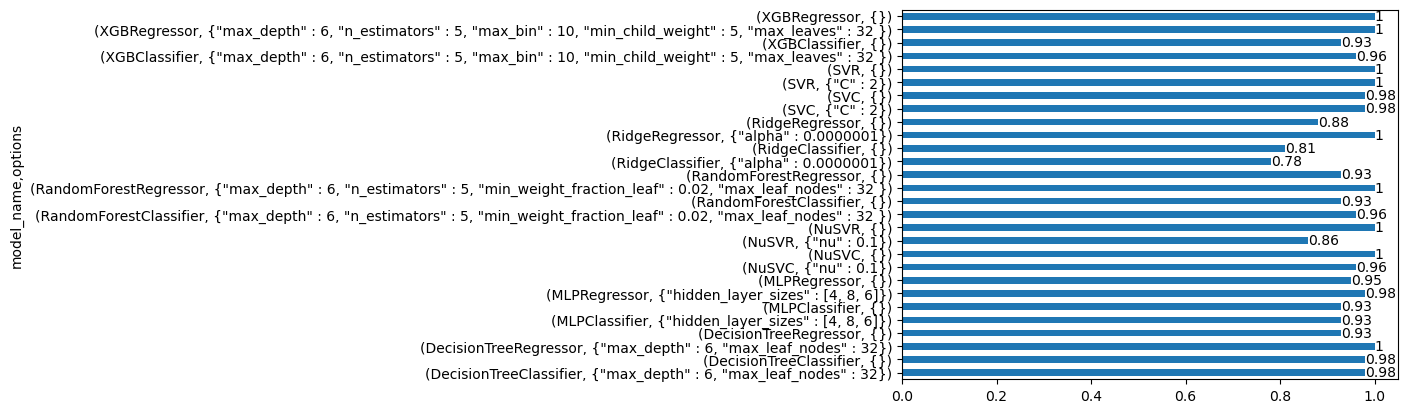

In [12]:
ax = success.plot.barh()
ax.bar_label(ax.containers[0])

In [13]:
counts = concatenated.groupby(by=['model_name', 'options'], dropna=False)['different'].count()
sums = concatenated.groupby(by=['model_name', 'options'], dropna=False)['different'].sum()

df_c = pd.DataFrame(counts)
df_s = pd.DataFrame(sums)
df_c.columns = ['count']
df_cs = df_c.copy()
df_cs['sum'] = df_s['different']
df_cs

count  \
model_name             options                                                     
DecisionTreeClassifier {"max_depth" : 6, "max_leaf_nodes" : 32}               54   
                       {}                                                     54   
DecisionTreeRegressor  {"max_depth" : 6, "max_leaf_nodes" : 32}               42   
                       {}                                                     42   
MLPClassifier          {"hidden_layer_sizes" : [4, 8, 6]}                     54   
                       {}                                                     54   
MLPRegressor           {"hidden_layer_sizes" : [4, 8, 6]}                     42   
                       {}                                                     42   
NuSVC                  {"nu" : 0.1}                                           50   
                       {}                                                     42   
NuSVR                  {"nu" : 0.1}                                           42   
                       {}                                                     42   
RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...     54   
                       {}                                                     54   
RandomForestRegressor  {"max_depth" : 6, "n_estimators" : 5, "min_weig...     42   
                       {}                                                     42   
RidgeClassifier        {"alpha" : 0.0000001}                                  50   
                       {}                                                     52   
RidgeRegressor         {"alpha" : 0.0000001}                                  42   
                       {}                                                     42   
SVC                    {"C" : 2}                                              52   
                       {}                                                     52   
SVR                    {"C" : 2}                                              42   
                       {}                                                     42   
XGBClassifier          {"max_depth" : 6, "n_estimators" : 5, "max_bin"...     54   
                       {}                                                     54   
XGBRegressor           {"max_depth" : 6, "n_estimators" : 5, "max_bin"...     42   
                       {}                                                     42   

                                                                           sum  
model_name             options                                                  
DecisionTreeClassifier {"max_depth" : 6, "max_leaf_nodes" : 32}              1  
                       {}                                                    1  
DecisionTreeRegressor  {"max_depth" : 6, "max_leaf_nodes" : 32}              0  
                       {}                                                    3  
MLPClassifier          {"hidden_layer_sizes" : [4, 8, 6]}                    4  
                       {}                                                    4  
MLPRegressor           {"hidden_layer_sizes" : [4, 8, 6]}                    1  
                       {}                                                    2  
NuSVC                  {"nu" : 0.1}                                          2  
                       {}                                                    0  
NuSVR                  {"nu" : 0.1}                                          6  
                       {}                                                    0  
RandomForestClassifier {"max_depth" : 6, "n_estimators" : 5, "min_weig...    2  
                       {}                                                    4  
RandomForestRegressor  {"max_depth" : 6, "n_estimators" : 5, "min_weig...    0  
                       {}                                                    3  
RidgeClassifier        {"alpha" : 0.0000001}                                11  
               